In [194]:
#!/usr/bin/env python
# -*- coding: UTF-8
from pylab import ion
import pandas as pd 
# import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import pdb

ion()

In [195]:
infile = {
    'train': './output/orig_train.csv',
    'test': './output/orig_test.csv',
    'train_pos': './output/train_POS.csv',
    'train_id': './output/train_id.csv.csv',
    'train_gender': './output/train_gen.csv',
    'train_age': './output/train_age.csv',
    'train_education': './output/train_edu.csv',
    'train_jieba': './output/train_jieba.csv',
    'test_pos': './output/test_POS.csv'
}

In [196]:
age = pd.read_csv(infile['train_age'], header = None, names = ['age'])
edu = pd.read_csv(infile['train_education'], header = None, names = ['edu'])
gen = pd.read_csv(infile['train_gender'], header = None, names = ['gen'])
pos = pd.read_csv(infile['train_pos'], header = None, names = ['pos'])
jie = pd.read_csv(infile['train_jieba'])
data = pd.concat([age,edu,gen])
train = pd.read_csv(infile['train'])

In [197]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 0 to 19999
Data columns (total 3 columns):
age    20000 non-null float64
edu    20000 non-null float64
gen    20000 non-null float64
dtypes: float64(3)
memory usage: 1.8 MB


In [198]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
ID           20000 non-null object
age          20000 non-null int64
Gender       20000 non-null int64
Education    20000 non-null int64
QueryList    20000 non-null object
dtypes: int64(3), object(2)
memory usage: 781.3+ KB


In [199]:
data.describe()

,age,edu,gen
count,20000.000000,20000.000000,20000.000000
mean,2.068500,3.906000,1.389350
std,1.183376,1.528784,0.529311
min,0.000000,0.000000,0.000000
25%,1.000000,3.000000,1.000000
50%,2.000000,4.000000,1.000000
75%,3.000000,5.000000,2.000000
max,6.000000,6.000000,2.000000


check the distributions

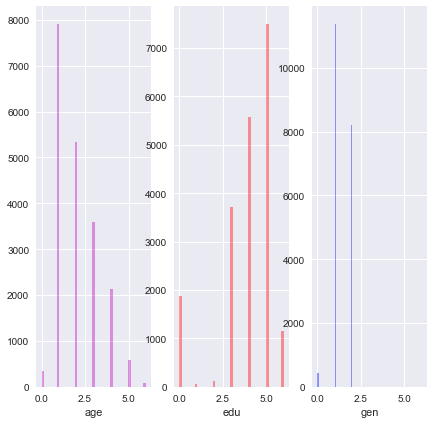

In [200]:
f, axes = plt.subplots(1, 3, figsize=(7, 7), sharex=True)

sns.distplot(age, color="m", kde=False, ax=axes[0],axlabel='age')
sns.distplot(edu, color="r", kde=False, ax=axes[1],axlabel='edu')
sns.distplot(gen, color="b", kde=False, ax=axes[2],axlabel='gen')

check the length of search terms.

In [201]:
train['count'] = train.QueryList.apply(lambda x: len(x.split("\t")))

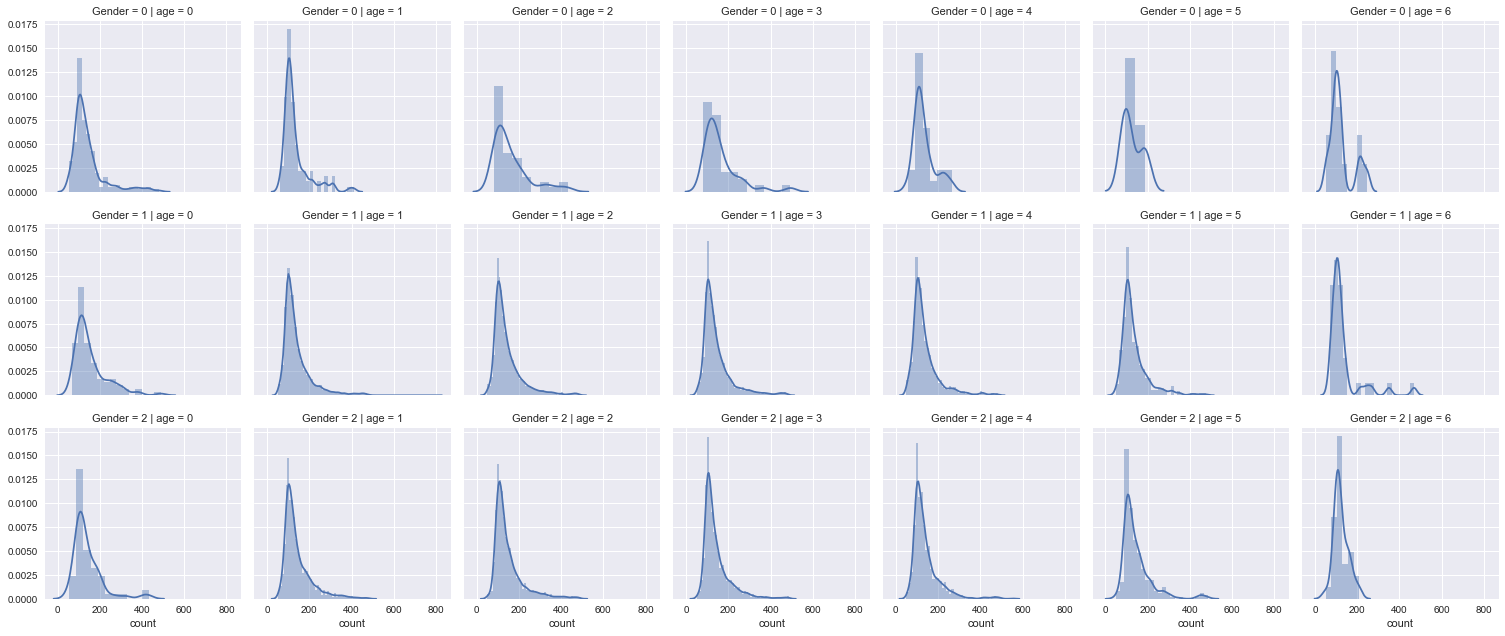

In [202]:
g = sns.FacetGrid(train, row='Gender', col='age')
g.map(sns.distplot, "count")
sns.plt.show()

In [203]:
from wordcloud import WordCloud

In [204]:
jie.columns

Index([u'Unnamed: 0', u'words'], dtype='object')

In [205]:
jie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
Unnamed: 0    20000 non-null int64
words         19999 non-null object
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


In [206]:
jie['age'] = train['age']
jie['edu'] = train['Education']
jie['gen'] = train['Gender']

In [209]:
jie.head()

,Unnamed: 0,words,age,edu,gen
0,0,双沟 女生 中财网 财经 周公 解梦 查询 曹云金 郭德纲 总裁 大人 行行好 中财网 财...,1,4,1
1,1,钢琴曲 欣赏 宝宝 眼睫毛 黄色 宝宝 右眼 眼屎 小儿 抽搐 剖腹产 刀口 线头 属鸡 ...,4,0,2
2,2,宠辱 小说 陶喆 类似 宝宝 穿越 记恋 童文 禁爱 诱惑 库克 抛售 苹果 股份 老人 ...,1,5,2
3,3,吴靖平 使用 假征 值税 发票 行为 抽到 解释 奔驰车 轿车 标志 购车 没有 取得 手...,6,3,1
4,4,普通 脉冲雷达 抑制 地面 回波 郭富城 电影 解码 判刑 民众 保护意识 人民 检察官 ...,3,2,1


In [216]:
#groupy_train = train.groupby('age').QueryList.apply(lambda x: "{%s}" %' '.join(x))
jieba_words = jie.words.str.cat(sep=' ')
#group_jieba = jie.groupby('age').words.apply(lambda x: "%s".decode().encode('utf-8') %" ".join(x))

In [208]:
word_counter = Counter()
for i in range(len(group_jieba)):
    print "___ ", i
    word_counter = word_counter + Counter(group_jieba[i].split())


___  0
___  1
___  2
___  3
___  4
___  5
___  6


In [218]:
for words in Counter(jieba_words.split()).most_common(20): print words[0],words[1]

图片 57467
手机 38520
意思 38159
视频 31863
小说 31642
下载 27277
电影 20007
中国 18782
世界 17410
重生 13598
官网 13540
百度 13517
英语 13127
电视剧 12443
游戏 12413
查询 12259
做法 12081
倾城 11572
荣耀 11322
大学 10598


In [ ]:
for words in word_counter.most_common(50): print words[0],words[1]

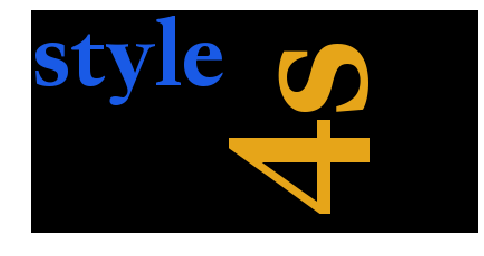

In [219]:
# word clound
fontfile = '/Library/Fonts/Songti.ttc'
#my_wordcloud = WordCloud(font_path=fontfile).generate(groupy_jieba[3])
my_wordcloud = WordCloud(font_path=fontfile).generate(jieba_words)

plt.imshow(my_wordcloud)
plt.axis("off")
plt.show()